# Análisis de Regresión IV


Para abrirlo con Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase14_AnalisisDeRegresionIV.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [3]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q
!pip install scikit-learn

## Regresión Lineal Multiple

Los análisis de regresión multiple nos permiten estimar asociaciones entre más de una variable.

In [4]:
import pandas as pd

wine_df = pd.DataFrame({
    "quality": [9.8, 12.6, 11.9, 11.1, 13.3, 12.8, 12.8, 12, 13.6, 13.9, 14.4, 12.3, 16.1, 16.1,
                15.5, 15.5, 13.8, 13.8, 11.3, 7.9, 15.1, 13.5, 10.8, 9.5, 12.7, 11.6, 11.7, 11.9,
                10.8, 8.5, 10.7, 9.1, 12.1, 14.9, 13.5, 12.2, 10.3, 13.2],
    "oakiness": [4.1, 3.9, 4.7, 3.6, 5.1, 4.1, 3.3, 5.2, 2.9, 3.9, 3.6, 3.6, 4.1, 3.7, 4.1,
                 4.4, 4.6, 4.1, 3.1, 3.4, 4.8, 3.8, 3.7, 4.0, 4.7, 4.9, 5.1, 5.1, 4.4, 3.9,
                 6.0, 4.7, 4.5, 5.2, 4.8, 3.3, 5.8, 3.5],
    "flavor": [3.1, 3.5, 4.8, 3.1, 5.5, 5.0, 4.8, 4.3, 3.9, 4.7, 4.5, 4.3, 7.0, 6.7, 5.8, 5.6, 4.8,
               5.5, 4.3, 3.4, 6.6, 5.3, 5.0, 4.1, 5.7, 4.7, 5.1, 5.0, 5.0, 2.9, 5.0, 3.0, 4.3, 6.0,
               5.5, 4.2, 3.5, 5.7],
    "body": [2.8, 4.9, 5.3, 2.6, 5.1, 4.7, 4.8, 4.5, 4.3, 3.9, 4.3, 5.4, 5.7, 6.6, 4.4, 5.6, 5.4,
             5.5, 4.1, 5.0, 5.4, 5.3, 4.1, 4.0, 5.4, 4.6, 4.0, 4.9, 4.4, 3.7, 4.3, 3.8, 3.5, 5.0,
             5.7, 4.7, 5.5, 4.8],
    "aroma": [3.3, 4.4, 3.9, 3.9, 5.6, 4.6, 4.8, 5.3, 4.3, 4.3, 5.1, 3.3, 5.9, 7.7, 7.1, 5.5, 6.3,
              5.0, 4.6, 3.4, 6.4, 5.5, 4.7, 4.1, 6.0, 4.3, 3.9, 5.1, 3.9, 4.5, 5.2, 4.2, 3.3, 6.8,
              5.0, 3.5, 4.3, 5.2],
    "clarity": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.8, 0.7, 1.0, 0.9, 1, 1, 1, 0.9, 0.9, 1, 0.7,
                0.7, 1, 1, 1, 1, 1, 1, 1, 0.8, 1, 1, 0.8, 0.8, 0.8, 0.8]
})

wine_df.head(5)


,quality,oakiness,flavor,body,aroma,clarity
0,9.8,4.1,3.1,2.8,3.3,1.0
1,12.6,3.9,3.5,4.9,4.4,1.0
2,11.9,4.7,4.8,5.3,3.9,1.0
3,11.1,3.6,3.1,2.6,3.9,1.0
4,13.3,5.1,5.5,5.1,5.6,1.0


Podemos analizar cual de las variables influye, de forma independiente, a la calidad del vino.

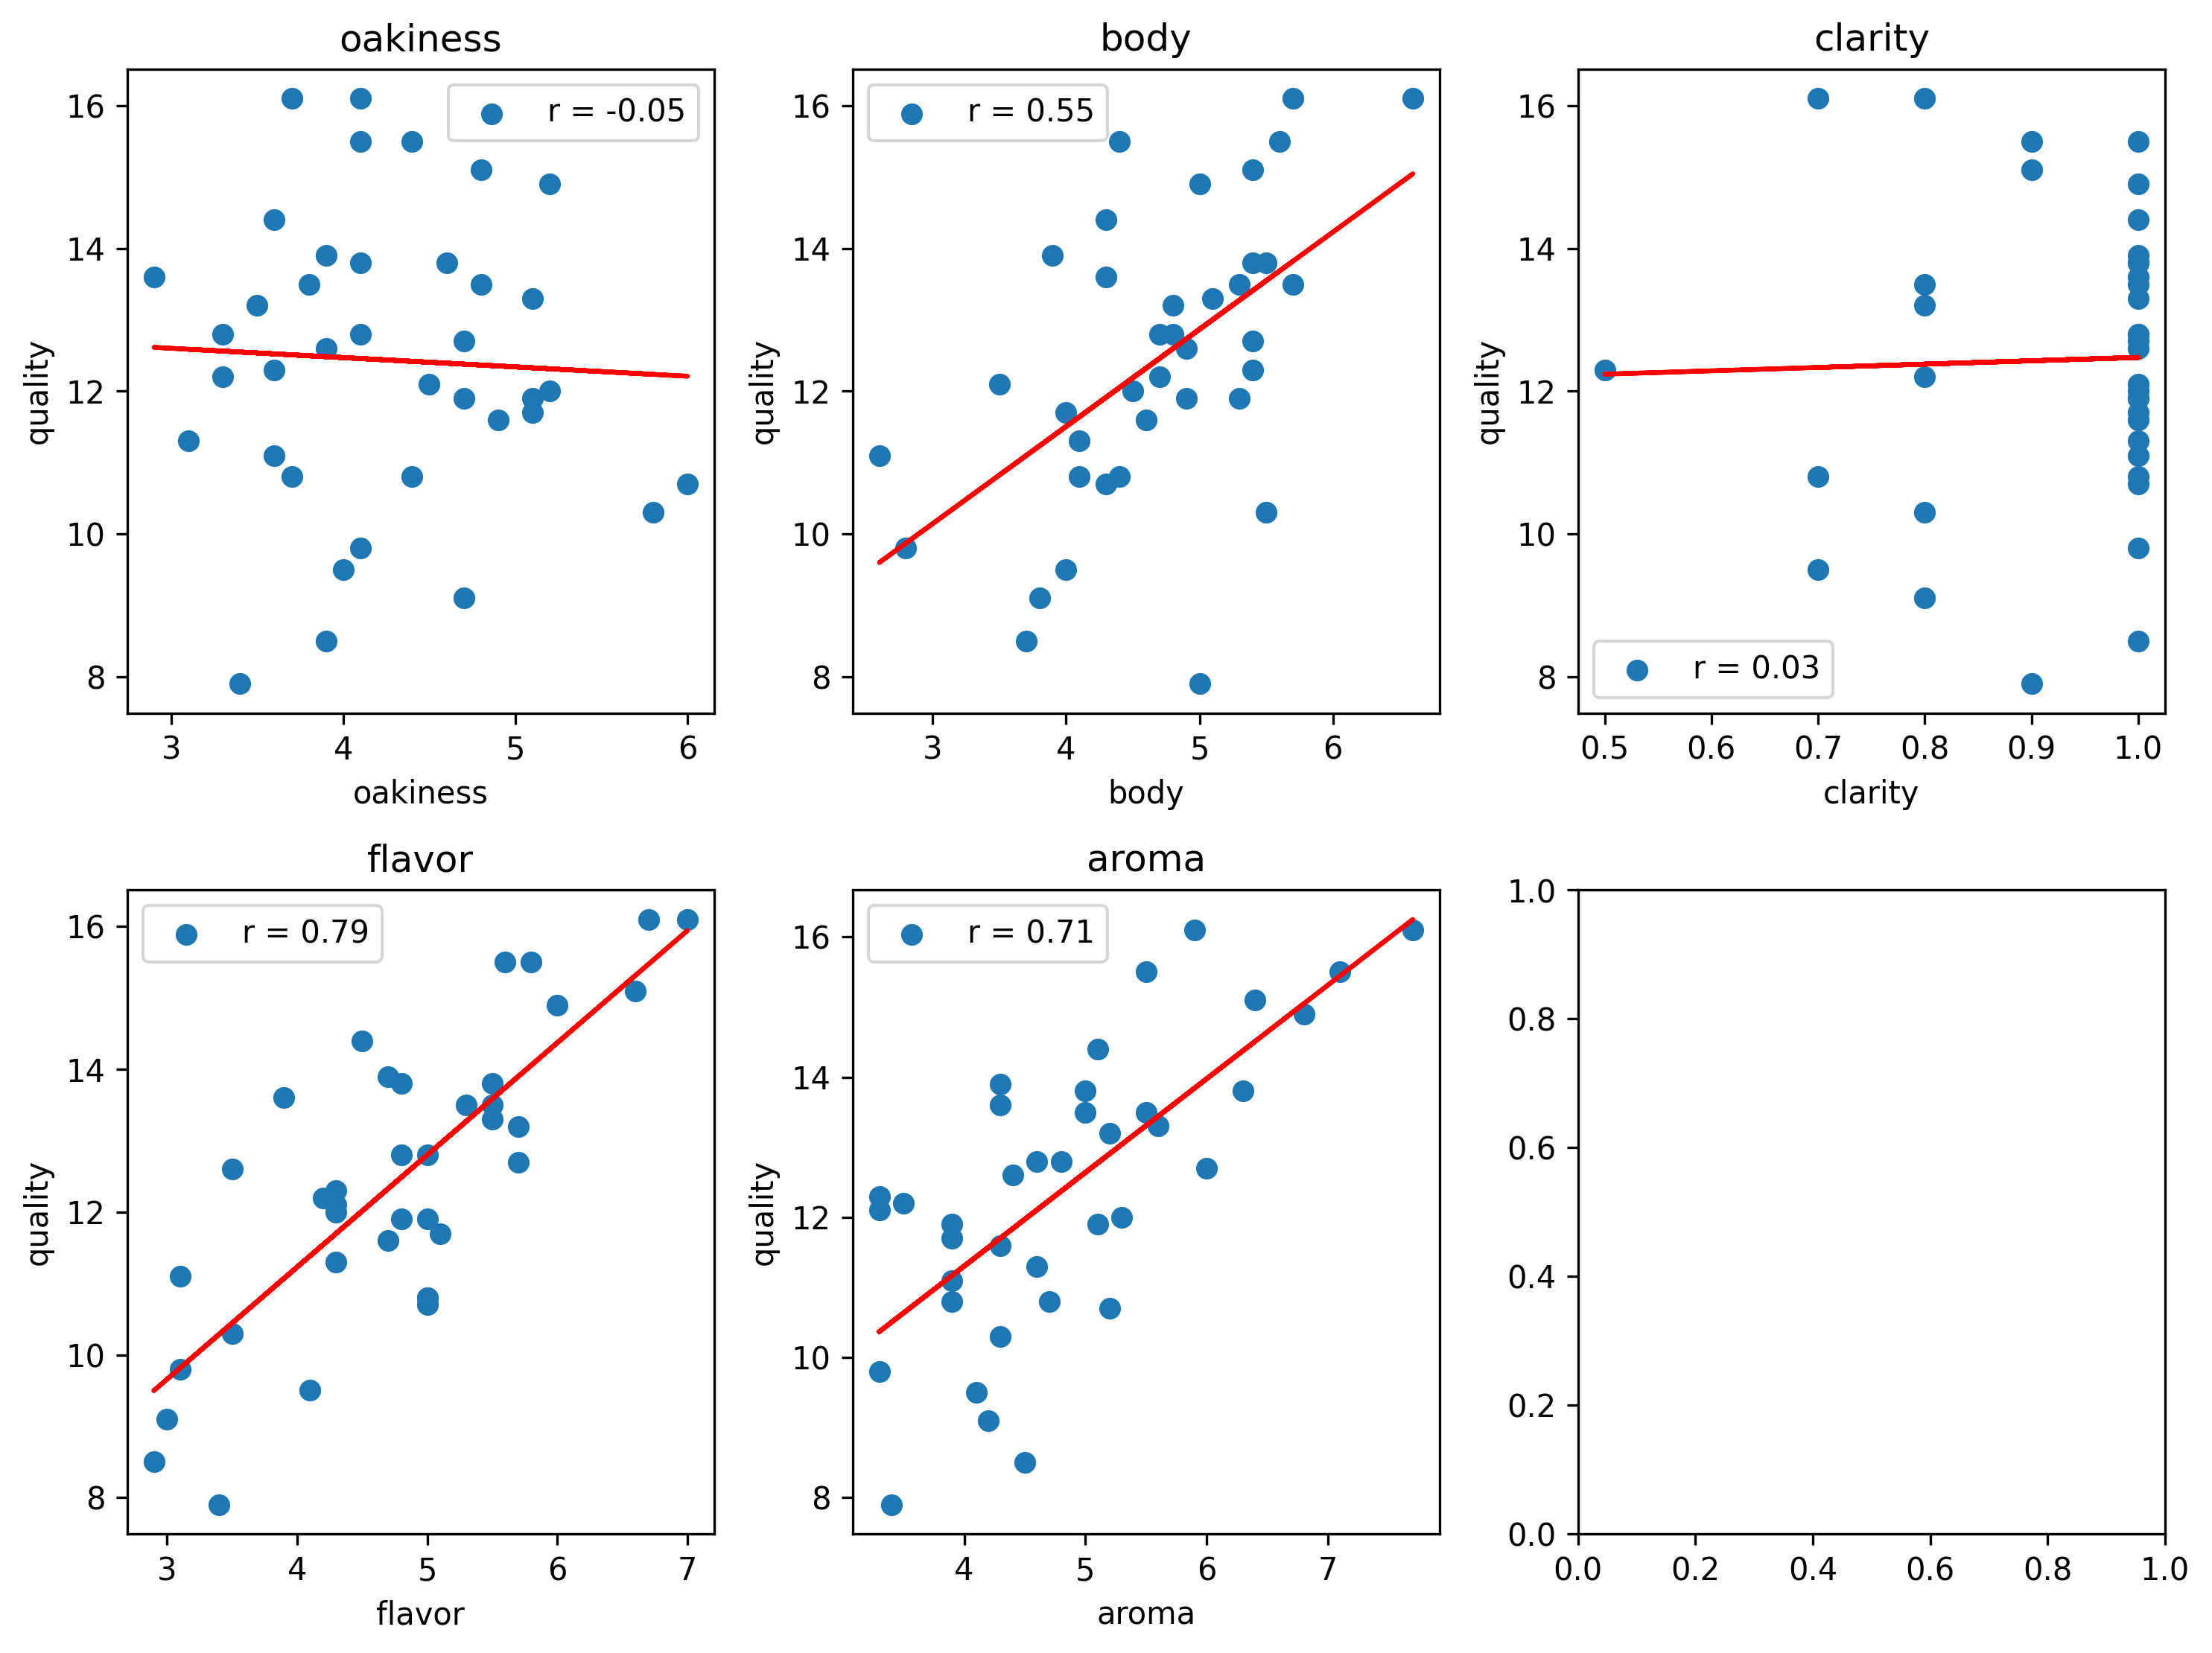

In [34]:
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
respuesta = ['quality']
variables = ['oakiness', 'flavor', 'body', 'aroma', 'clarity']
fig, ax = plt.subplots(2, 3, figsize = (10,7.5), dpi = 300)
x_index = 0
y_index = 0
for var in variables:
    pearson_r, p_value = st.pearsonr(wine_df[var], wine_df[respuesta[0]])
    ax[x_index, y_index].scatter(wine_df[var], wine_df[respuesta], label = f'r = {pearson_r:.2f}')
    ax[x_index, y_index].legend()
    ax[x_index, y_index].set_title(var)
    ax[x_index, y_index].set_xlabel(var)
    ax[x_index, y_index].set_ylabel(respuesta[0])

    slope, intercept, r_value, p_value, std_err = st.linregress(wine_df[var], wine_df[respuesta[0]])
    line = slope*wine_df[var] + intercept
    ax[x_index, y_index].plot(wine_df[var], line, 'r')


    x_index += 1
    if x_index == 2:
        x_index = 0
        y_index = y_index + 1
plt.tight_layout()

Ahora, se puede realizar una regresión utilizando todas las variables juntas para predecir la calidad del vino.

In [8]:
model_wine = sm.OLS(wine_df[respuesta], sm.add_constant(wine_df[variables])).fit()
print(model_wine.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     16.51
Date:                Fri, 02 May 2025   Prob (F-statistic):           4.70e-08
Time:                        20:44:33   Log-Likelihood:                -56.378
No. Observations:                  38   AIC:                             124.8
Df Residuals:                      32   BIC:                             134.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9969      2.232      1.791      0.0

Aquí cada parametro es el utilizado para el ajuste de forma:
$$ y = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + \epsilon$$
Para cada instancia de y. Siendo así, un modelo lineal para la variable y en base a las co-variables que existen en el modelo.

El método `.summary()` provee del $R^2$ ajustado para el modelo multivariado.

In [15]:
# analicemos el cambio de R2
mod_flavor = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[['flavor']])).fit()
print(mod_flavor.rsquared)

# ahora agregamos oakiness
mod_flavor_oaki = sm.OLS(wine_df['quality'],
                         sm.add_constant(wine_df[['flavor', 'oakiness']])).fit()
print(mod_flavor_oaki.rsquared)

0.6241744751817518
0.6611116460463782


Al agregar una variable completamente aleatoria, el $R^2$ también aumenta.

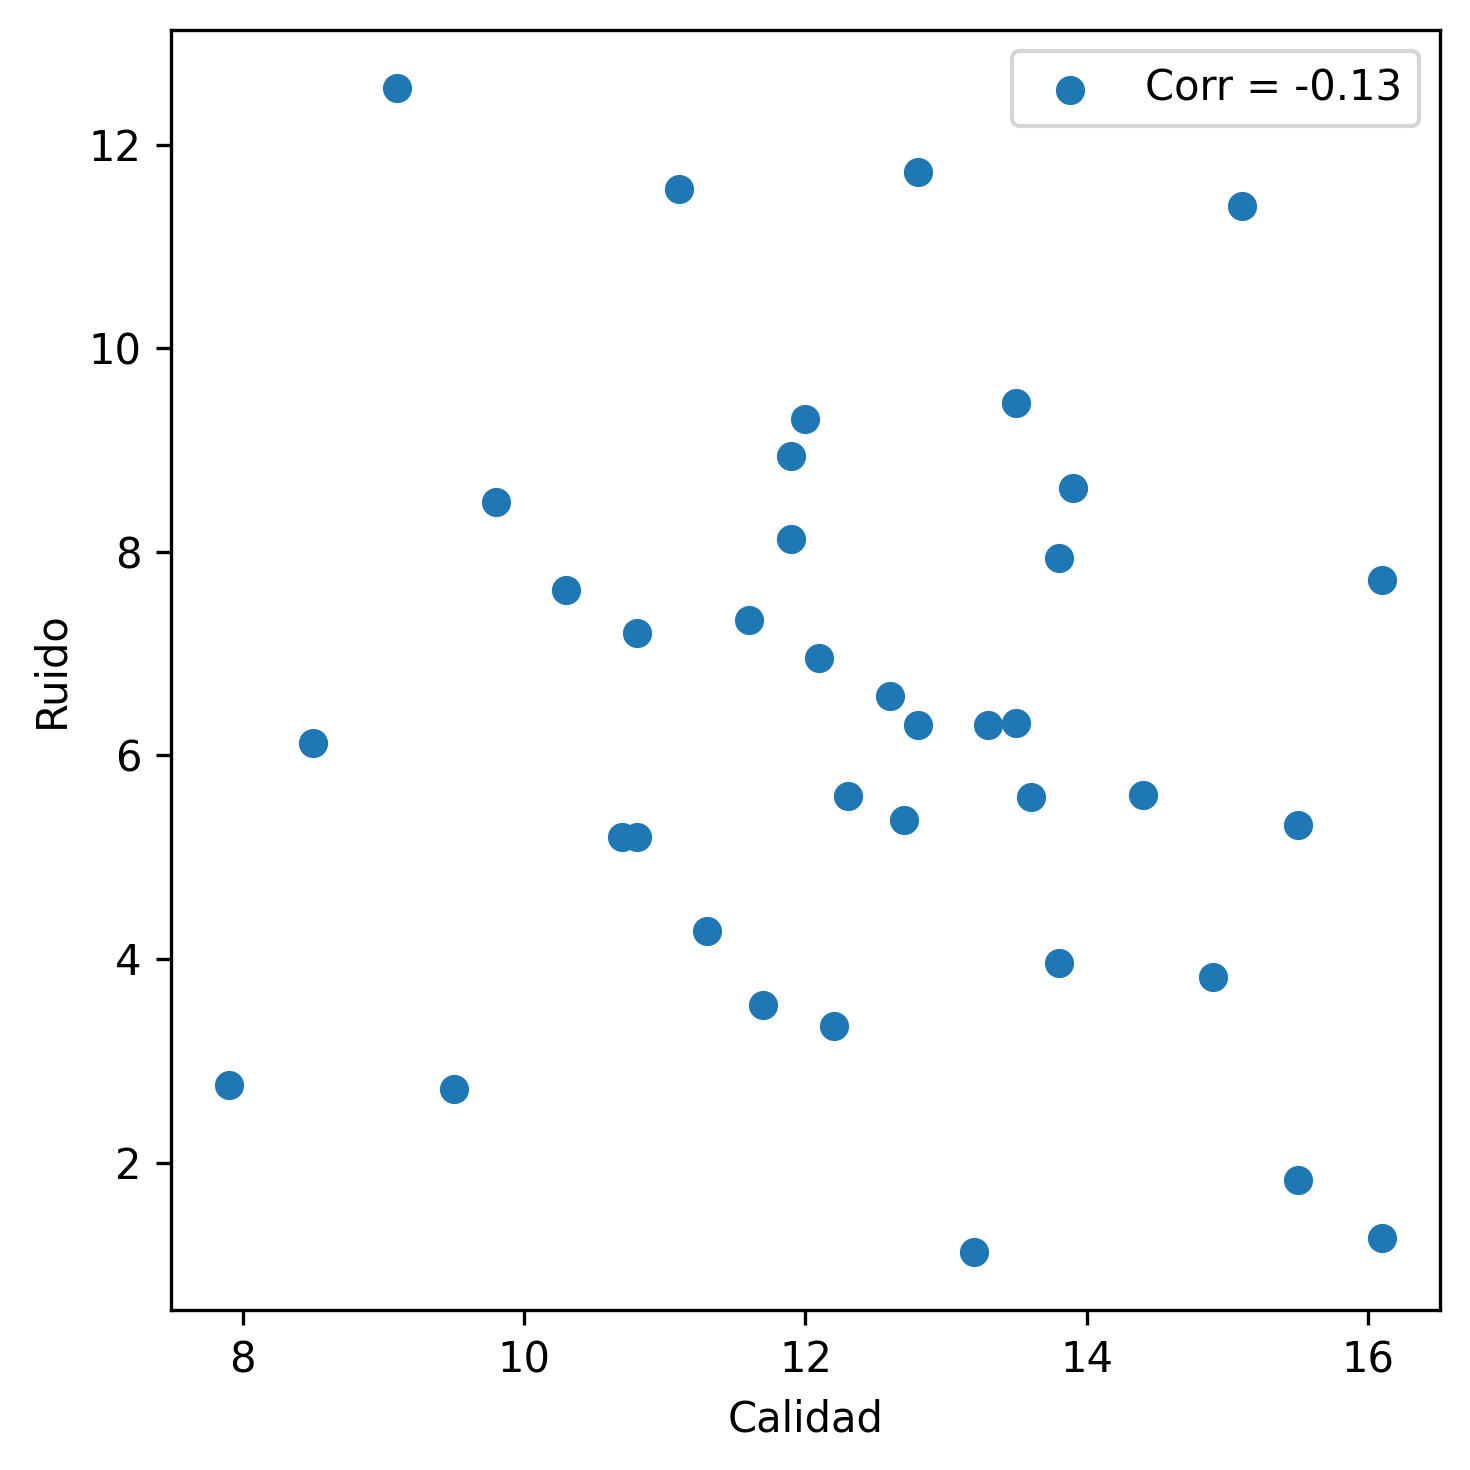

In [22]:
np.random.seed(42)
wine_df['Ruido'] = st.norm.rvs(loc = 7, scale = 3, size = len(wine_df))

fig, ax = plt.subplots(1, figsize = (5,5), dpi = 300)
pearsonr_var = st.pearsonr(wine_df['quality'], wine_df['Ruido'])[0]
ax.scatter(wine_df['quality'], wine_df['Ruido'],
           label = f'Corr = {pearsonr_var:.2f}')
ax.set_xlabel('Calidad')
ax.set_ylabel('Ruido')
ax.legend()
plt.tight_layout()



In [27]:
# modelo ruido flavor
np.random.seed(42)
wine_df['Ruido'] = st.norm.rvs(loc = 7, scale = 3, size = len(wine_df))

mod_ruido_flavor = sm.OLS(wine_df['quality'],
                          sm.add_constant(wine_df[
                              ['flavor','oakiness','Ruido']])).fit()
print(mod_ruido_flavor.rsquared)

0.6715051328146242


In [30]:
print(mod_ruido_flavor.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     23.17
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.38e-08
Time:                        21:08:34   Log-Likelihood:                -59.453
No. Observations:                  38   AIC:                             126.9
Df Residuals:                      34   BIC:                             133.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4528      1.456      4.431      0.0

Para poder analizar la multicolinealidad de los datos, es necesario calcular la matriz de correlación. Para esto se puede utilizar la siguiente función:

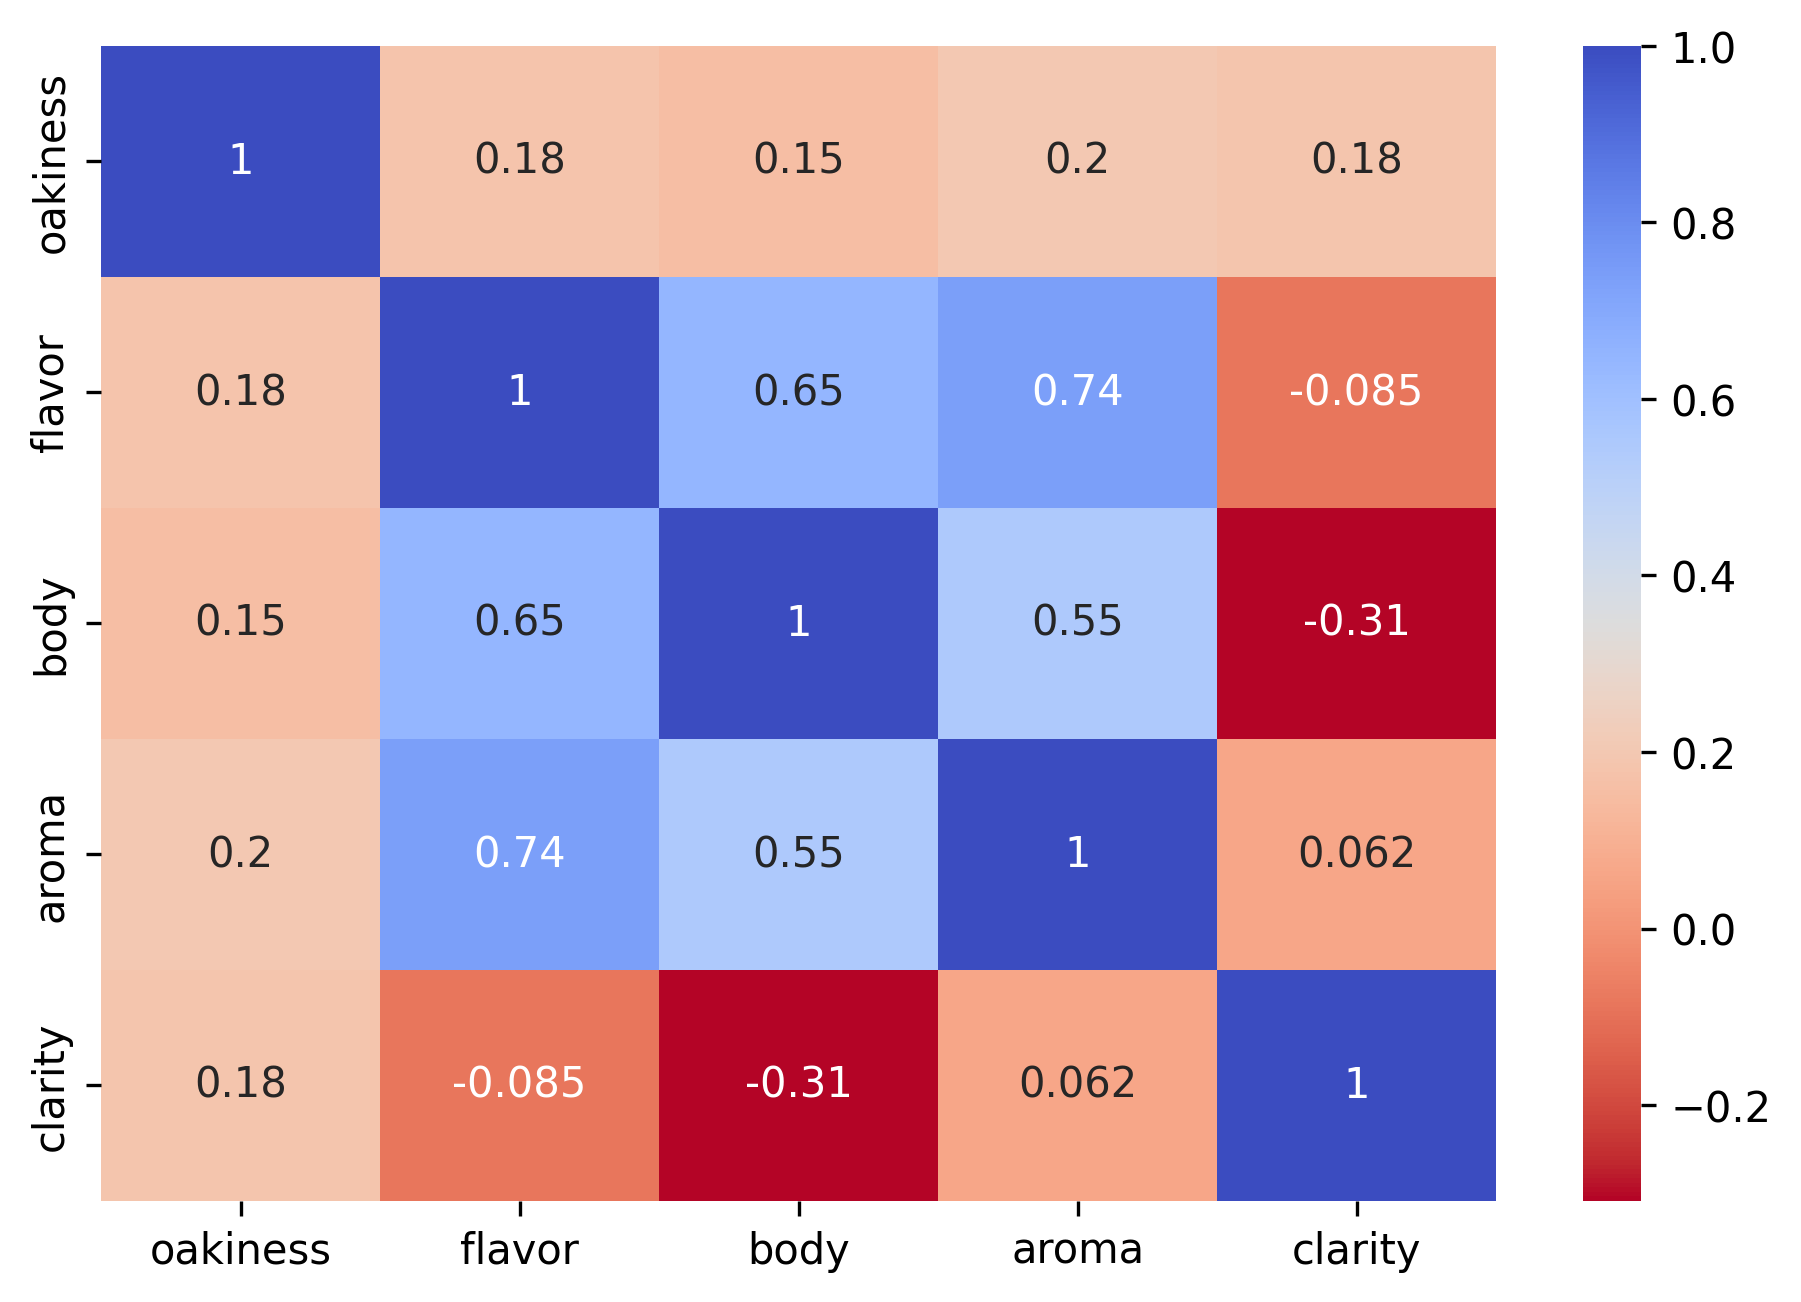

In [33]:

import seaborn as sns
corr = np.corrcoef(wine_df[variables].T)
fig, ax = plt.subplots(figsize = (7.5,5), dpi = 300)
sns.heatmap(corr, annot=True, cmap='coolwarm_r',
            xticklabels=variables, yticklabels=variables, ax = ax)
plt.show()


Es importante también ver el impacto que tiene agragar una variable a un modelo. Sabemos que el `aroma` y `flavor` están relacionados. Analicemos este caso:

In [35]:
# modelo flavor
mod_flavor = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[['flavor']])).fit()
print(mod_flavor.summary())

# modelo aroma
mod_aroma = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[['aroma']])).fit()
print(mod_aroma.summary())

# modelo aroma + flavor
mod_aroma_flavor = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[['aroma', 'flavor']])).fit()
print(mod_aroma_flavor.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     59.79
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.68e-09
Time:                        21:20:01   Log-Likelihood:                -62.011
No. Observations:                  38   AIC:                             128.0
Df Residuals:                      36   BIC:                             131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9414      0.991      4.986      0.0

A su vez, es posible analizar el Factor de Inflación de Varianza (VIF).

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_dict = {}
x = model_wine.model.exog
VIF = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
VIF_dict = dict(zip(model_wine.model.exog_names, VIF))
# to pandas
vif_df = pd.DataFrame(VIF_dict, index=[0]).drop(columns = 'const')
vif_df


,oakiness,flavor,body,aroma,clarity
0,1.096731,2.682277,2.056492,2.381143,1.26639


## Selección de modelos

Para seleccionar las variables que van a ser parte de los modelos se pueden seguir diferentes procedimientos.

En primera instancia analizaremos en base a el impacto del modelo.

In [37]:
# eliminamos clarity por su bajo impacto
mod_clary = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[
                        ['oakiness', 'flavor', 'body', 'aroma']])).fit()
print(mod_clary.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     19.69
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.29e-08
Time:                        21:35:51   Log-Likelihood:                -57.428
No. Observations:                  38   AIC:                             124.9
Df Residuals:                      33   BIC:                             133.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2670      1.483      4.225      0.0

Ahora eliminamos `body` dada su baja influencia en el modelo

In [38]:
mod_clary_bod = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[
                        ['oakiness', 'flavor', 'aroma']])).fit()
print(mod_clary_bod.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     26.92
Date:                Fri, 02 May 2025   Prob (F-statistic):           4.20e-09
Time:                        21:37:04   Log-Likelihood:                -57.489
No. Observations:                  38   AIC:                             123.0
Df Residuals:                      34   BIC:                             129.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4672      1.333      4.852      0.0

Veamos que pasa si eliminamos aroma.

In [39]:
mod_fla_oak = sm.OLS(wine_df['quality'],
                    sm.add_constant(wine_df[
                        ['oakiness', 'flavor']])).fit()
print(mod_fla_oak.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     34.14
Date:                Fri, 02 May 2025   Prob (F-statistic):           5.97e-09
Time:                        21:38:02   Log-Likelihood:                -60.045
No. Observations:                  38   AIC:                             126.1
Df Residuals:                      35   BIC:                             131.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9122      1.389      4.977      0.0

El modelo empeora, así, la solución anterior (-clarity -body) es un óptimo.

Además, el paquete `scikit-learn`, el cual es altamente utilizado en Machine Learning, permite utilizar diferentes implementaciones para evaluar las variables que entran al modelo. El caso implementado en clases corresponde a una selección secuencial de variables, aunque también se pueden utilizar busquedas recursivas o K-mejores.
Pueden encontrar más métodos en la siguiente documentación:
- https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance

In [54]:
import sklearn as sk
X = wine_df[variables]
y = wine_df[respuesta]
estimator = sk.linear_model.LinearRegression()

selector = sk.feature_selection.SequentialFeatureSelector(estimator,
                                                            direction = 'backward',
                                                            n_features_to_select='auto')
selector.fit(X, y)
features = selector.get_feature_names_out()
print(features)




['oakiness' 'flavor' 'aroma']


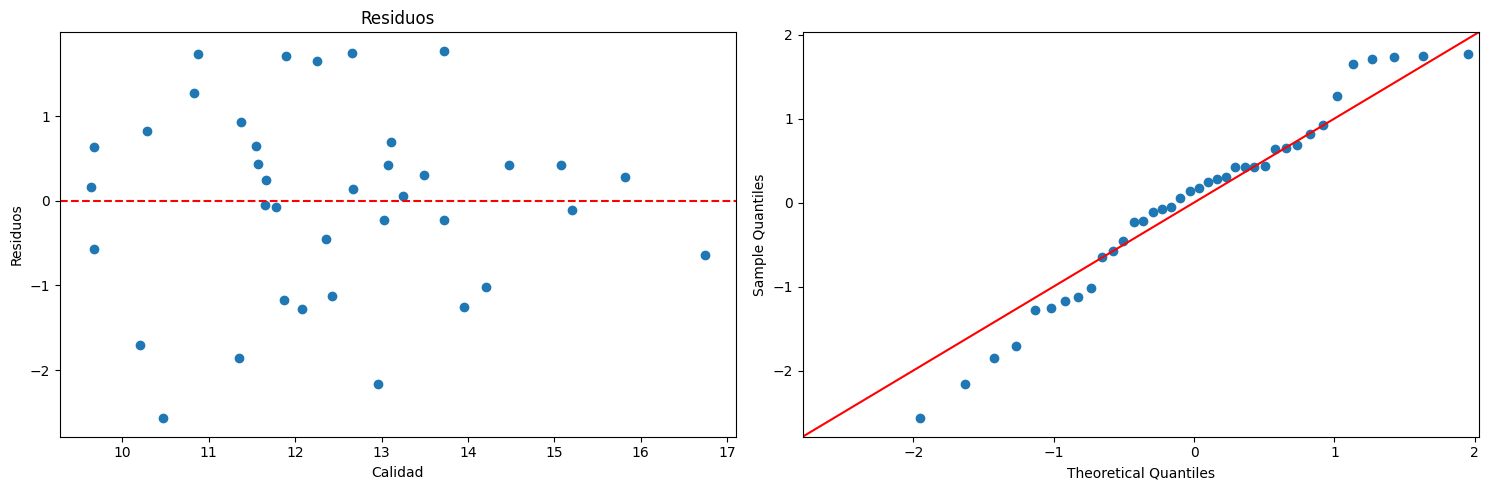

In [ ]:
# Analizamos los residuos
fig, ax = plt.subplots(1, 2, figsize = (15,5))
selected_model = sm.OLS(wine_df[respuesta], sm.add_constant(wine_df[X.columns[selector.support_].to_list()])).fit()
ax[0].scatter(selected_model.fittedvalues, selected_model.resid)
ax[0].set_title('Residuos')
ax[0].set_xlabel('Calidad')
ax[0].set_ylabel('Residuos')
ax[0].axhline(y=0, color='r', linestyle='--')
sm.graphics.qqplot(selected_model.resid, ax=ax[1], line = '45')
plt.tight_layout()
